### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [84]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [85]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars


In [86]:
# Any missing values?
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [87]:
# Explore the data using head function
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [88]:
#Explore the data using tail function
reviews.tail()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
1995,Female,37,84.46,69,4031,PhD,EN,Web,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,EN,Web,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,EN,Web,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,EN,Web,1031,fun game!,Four Stars
1999,Male,32,92.66,8,479,PhD,EN,Web,453,This game is fun. A lot like scrabble without ...,Love this game


In [89]:
# View the Turtle reviews' metadata
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [90]:
# Descriptive statistics.
print(reviews.describe())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  


## 2. Drop columns

In [91]:
# Drop unnecessary columns.
    # language & platform using the drop function

reviews = reviews.drop(['language', 'platform'], axis=1)
# View column names.
list(reviews.columns)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [92]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
list(reviews.columns)

['gender',
 'age',
 'remuneration',
 'spending_score',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 4. Save the DataFrame as a CSV file

In [93]:
# Create a CSV file as output.
reviews.to_csv('cleaned_turtle_reviews.csv', index=False)

In [94]:
# Import new CSV file with Pandas.
clean_reviews = pd.read_csv('cleaned_turtle_reviews.csv')
print(clean_reviews.shape)

# View DataFrame.
clean_reviews

(2000, 9)


,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 5. Linear regression

### 5a) spending vs loyalty

In [95]:
# Independent variable.
    #We call it 'x'.
x = clean_reviews[['spending_score']]

# Dependent variable.
    #We will call it 'y'.
y = clean_reviews['loyalty_points']

# OLS model and summary.
    #Fitting the model.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          2.92e-263
Time:                        16:41:56   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#R-sq 45%
𝑅2 : 45% of the total variability of y (loyalty), is explained by the variability of X (spending).
F-stat: The probability of F stat. is smaller than a threshold (we assumed 0.05), so the set of variables of the regression model are significant.

In [96]:
# Extract the estimated parameters.

print("Parameters: ", test.params)  

# Extract the standard errors.

print("Standard errors: ", test.bse)   

# Extract the predicted values.

print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [97]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.061693 * clean_reviews['spending_score']


# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

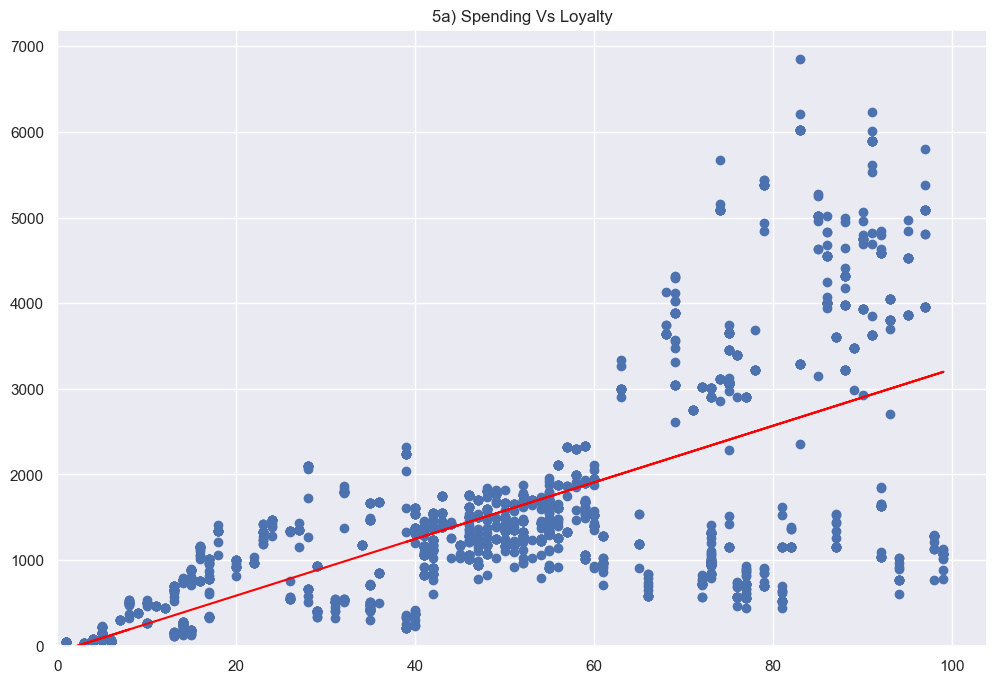

In [98]:
# Plot the graph with a regression line.
#scatterplotting
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
# Then we set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.title("5a) Spending Vs Loyalty")
# View the plot.
plt.show()

### 5b) renumeration vs loyalty

In [99]:
# Independent variable.
x = clean_reviews[['remuneration']]

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model 
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()
#print  summary.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 14 Sep 2023   Prob (F-statistic):          2.43e-209
Time:                        16:41:56   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#R-squared:	0.380 

Summary:
𝑅2: 38% of the total variability of y (LOYALTY), is explained by the variability of X variable (REMUNERATION).
F-stat: The probability of F stat. is smaller than the threshold (we assumed 0.05), so the set of variables of the regression model are significant.

In [101]:
# Extract the estimated parameters.

print("Parameters: ", test.params)  

# Extract the standard errors.

print("Standard errors: ", test.bse)   

# Extract the predicted values.

print("Predicted values: ", test.predict())  

Parameters:  Intercept   -65.686513
x            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [102]:

# Set the X coefficient and the constant to generate the regression table.
y_pred = (-65.686513) + 34.187825 * clean_reviews['remuneration']

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

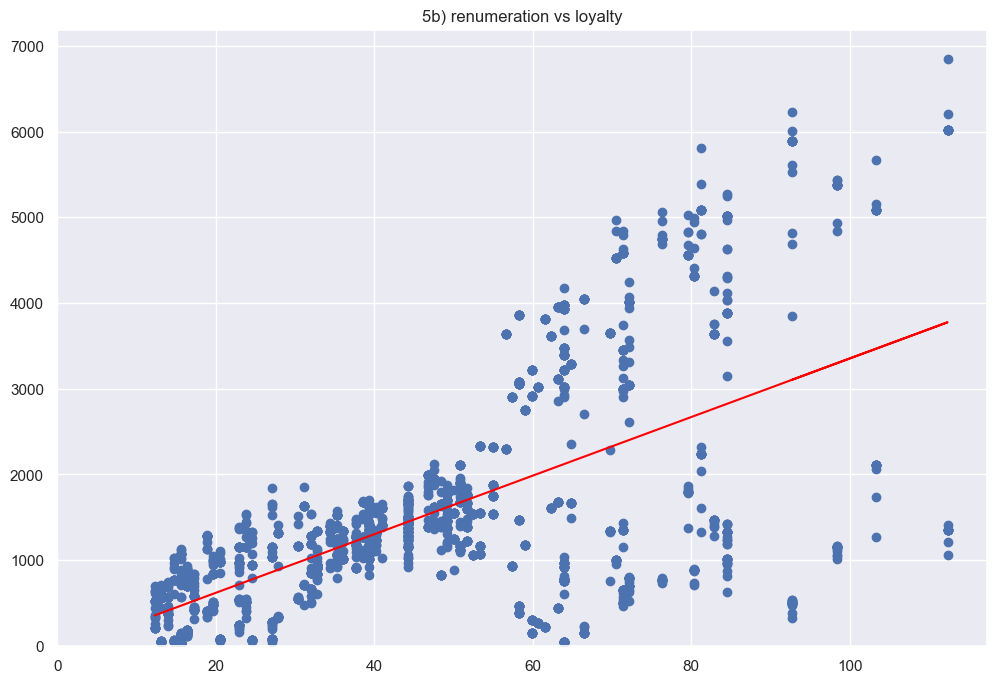

In [103]:
# Plot graph with regression line.
plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.xlim(0)
plt.ylim(0)
plt.title('5b) renumeration vs loyalty')
#view the plot.
plt.show()

### 5c) age vs loyalty

In [104]:
# Independent variable.
x = clean_reviews[['age']]

# Dependent variable.
y = clean_reviews['loyalty_points']

# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = clean_reviews).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 14 Sep 2023   Prob (F-statistic):             0.0577
Time:                        16:41:56   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

𝑅2: 2% of the total variability of y (loyalty), is explained by the variability of X (age).
F-stat: The probability of F stat. is bigger than the threshold (we assumed 0.05), so the regression is not good.

In [105]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)   

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [106]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (1736.517739) + -4.012805 * clean_reviews['age']

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

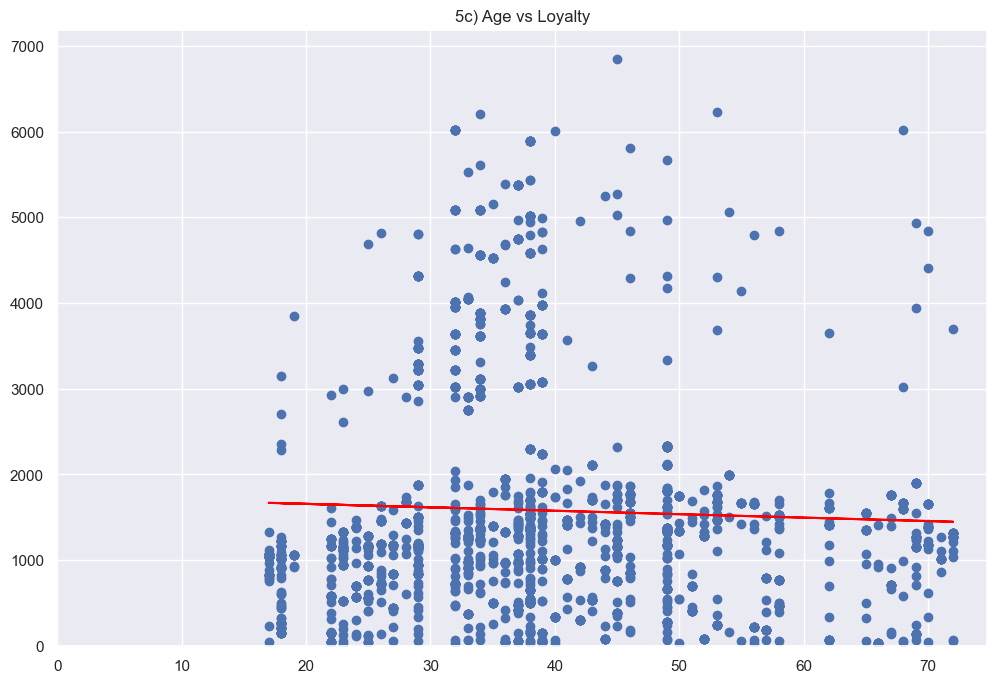

In [107]:
# Plot graph with regression line.

plt.scatter(x, y)

# Plot the regression line.
plt.plot(x, y_pred, color='red')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)
plt.title('5c) Age vs Loyalty')
# View the plot.
plt.show()

Note:high P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable.

## 6. Observations and insights

***Your observations here...***






For finding out linear regression ,we needed the indipendent variabes such as age,remuneration and spending scores and for dependent variabiables like loyalty.After OLS model we extracted the parameters,errors and predicted values.
Then we generated a regression table based on coefficent and constants.As a final stage,we scatterplotted linear regession with regression line as coloured red.
5A and 5B examples are valid however 5c (Age vs Loyality) as P-value (> 0.05) means that we cannot conclude that the explanatory variable affects the dependent variable and cannot used.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [108]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [109]:
# Load the CSV file(s) as df2.

df2 = clean_reviews[["remuneration", "spending_score"]]

# View DataFrame.
df2


,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [110]:
# Explore the data.
df2.info()


# View DataFrame.
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [111]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

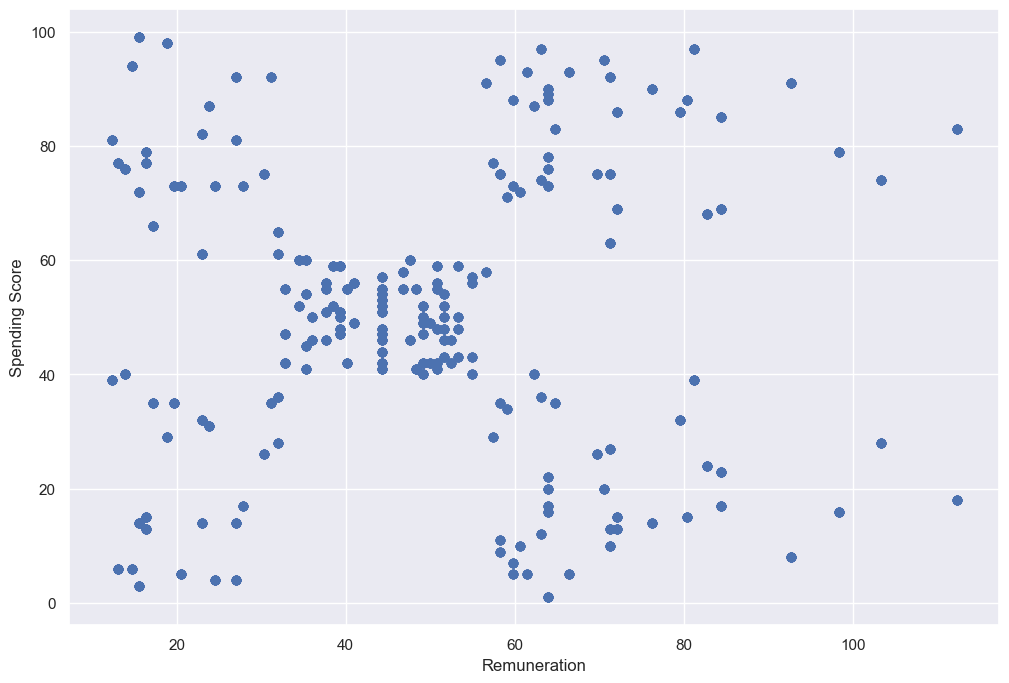

In [112]:
# Create a scatterplot with Seaborn.
plt.scatter(df2["remuneration"], df2["spending_score"])
plt.xlabel("Remuneration")
plt.ylabel("Spending Score")
plt.show()

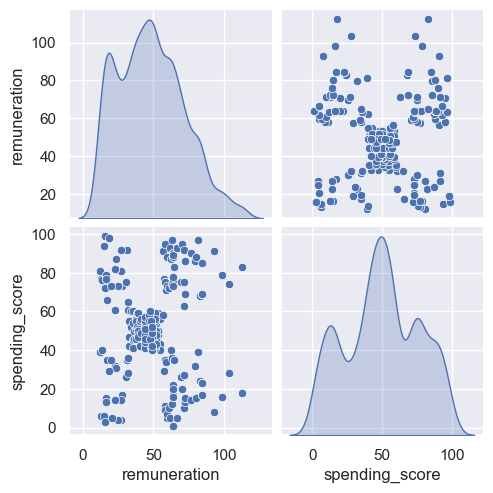

In [113]:
# Create a pairplot with Seaborn.
sns.pairplot(df2, diag_kind = 'kde')
plt.show()

## 3. Elbow and silhoutte methods

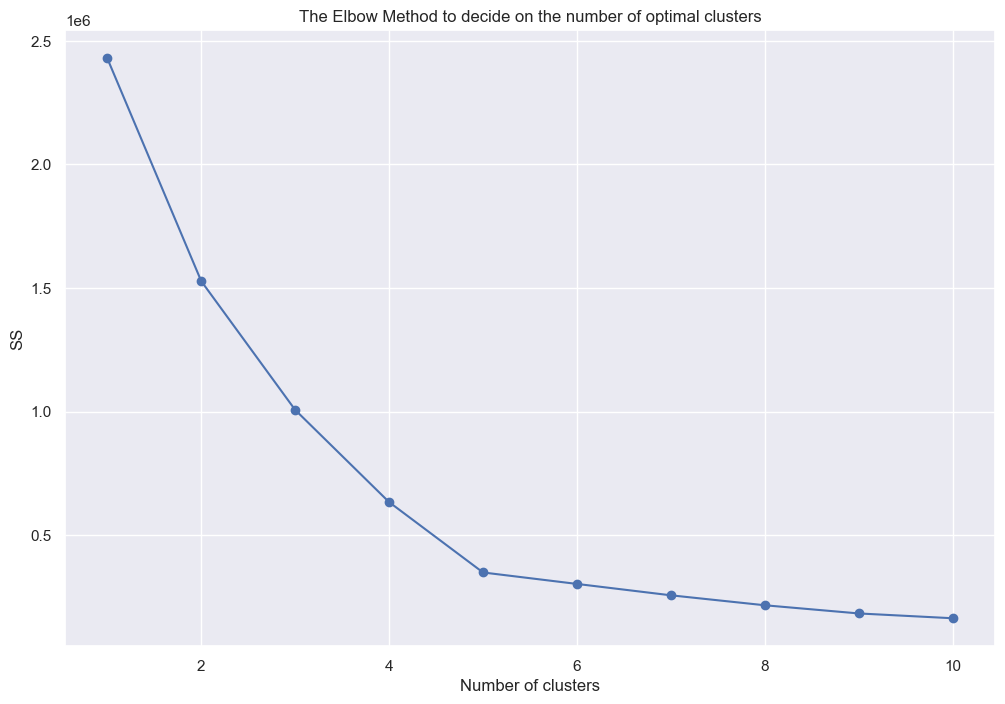

In [114]:
# Determine the number of clusters: Elbow method.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method to decide on the number of optimal clusters")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

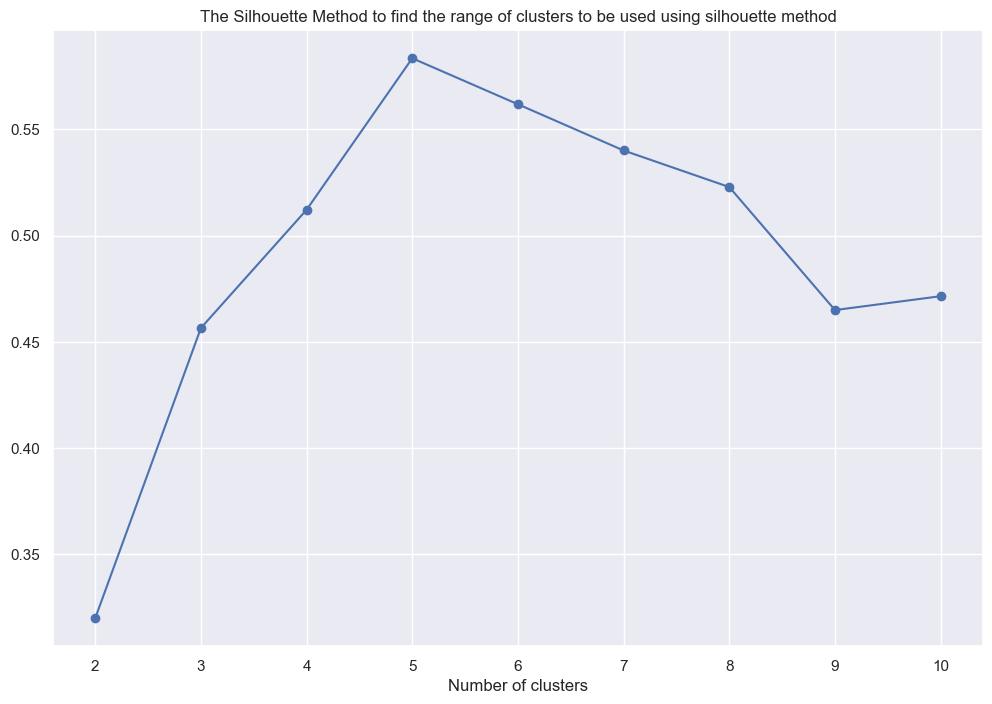

In [115]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method to find the range of clusters to be used using silhouette method")
plt.xlabel("Number of clusters")

plt.show()

## 4. Evaluate k-means model at different values of *k*

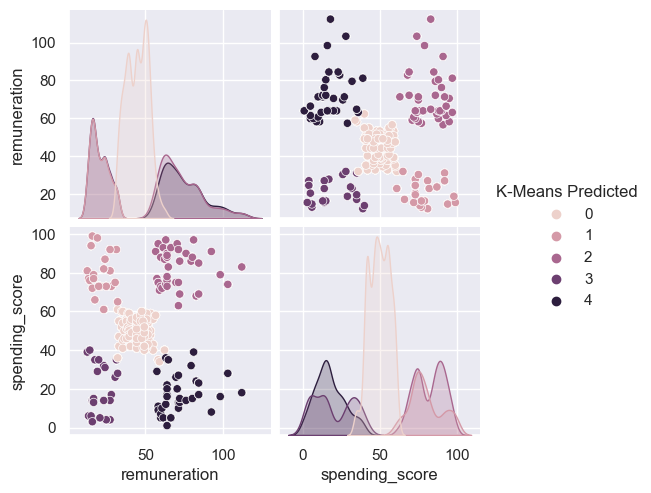

In [116]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [117]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

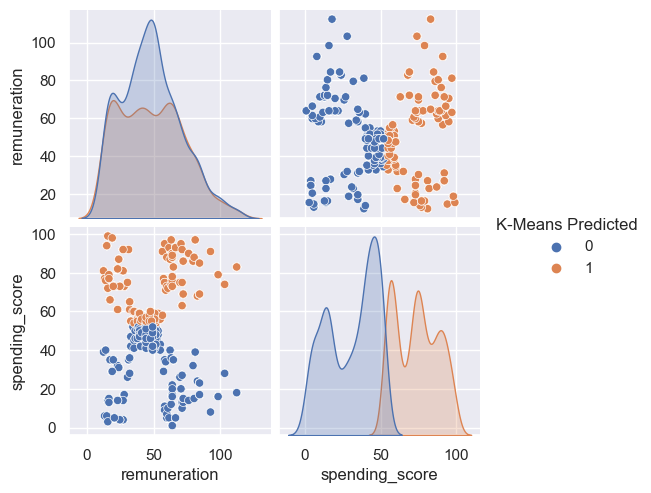

In [118]:
# Use 2 clusters:
kmeans = KMeans(n_clusters = 2,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [119]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    1106
1     894
Name: K-Means Predicted, dtype: int64

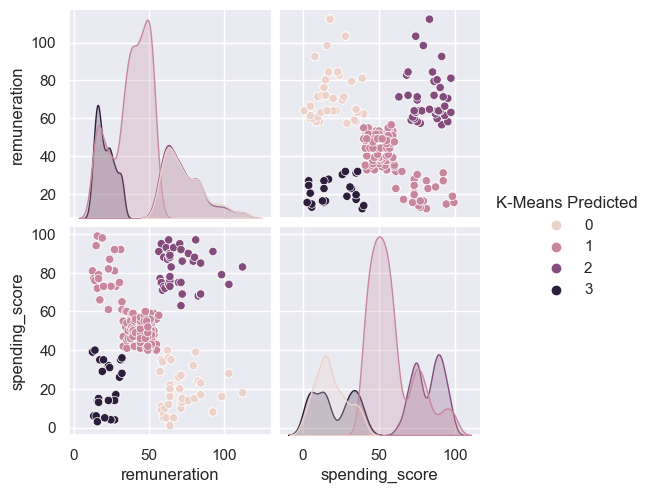

In [120]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [121]:
#the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

1    1013
2     356
0     351
3     280
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

In [122]:
df2

,remuneration,spending_score,K-Means Predicted
0,12.30,39,3
1,12.30,81,1
2,13.12,6,3
3,13.12,77,1
4,13.94,40,3
...,...,...,...
1995,84.46,69,2
1996,92.66,8,0
1997,92.66,91,2
1998,98.40,16,0


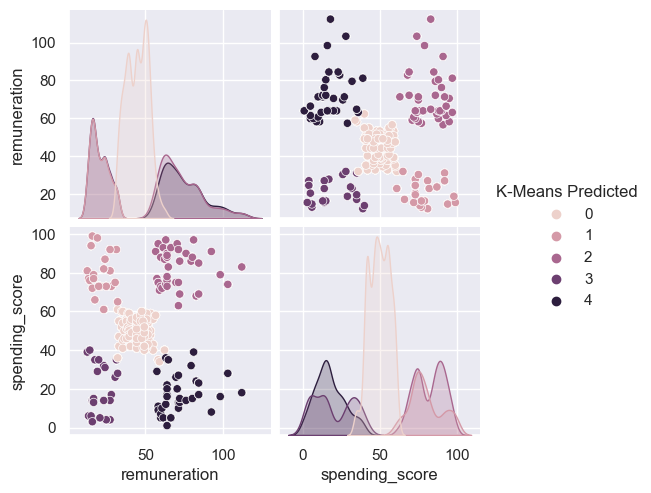

In [123]:

# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [124]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

Cluster 0 appears to be the largest as it can be seen as the typical (average) customer group that has an average level of spending and remuneration.

## 6. Plot and interpret the clusters

Text(0, 0.5, 'Loyalty Points')

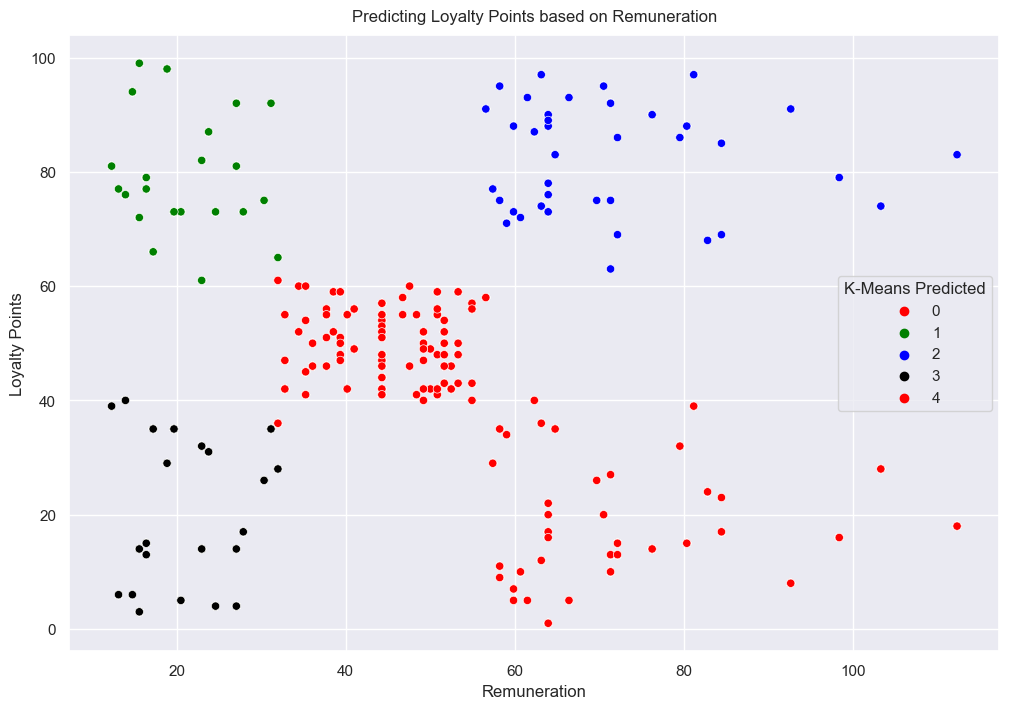

In [125]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2 ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

# Chart title
plt.title("Predicting Loyalty Points based on Remuneration", loc='center', pad=10)
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points")


In [126]:
# Visualising the clusters.

print(df2.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


## 7. Discuss: Insights and observations

***Your observations here...***

According to the methods suggested a value of k between 4 and 6. After testing all three, k = 5 yeilded the most distinct and clusters. This suggests that customers can largely be placed in 5 groups depending on their remuneration and and spending score.
Cluster 0 appears to be the largest as it can be seen as the average customer group that has an average level of spending and remuneration.
To sum up;it may be best to focuse mostly on customers that fit within cluster 0 and also those who tend to have a higher remuneration score if the goal is to target the highest numbers of customers.


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [4]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

!pip install wordcloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
!pip install TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

                                              0.0/636.8 kB ? eta -:--:--
     -------------                          225.3/636.8 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 8.0 MB/s eta 0:00:00


In [20]:
# Load the data set as df3.
df3 = pd.read_csv('cleaned_turtle_reviews.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [21]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [24]:
# Drop unnecessary columns.
df3 = df3[['review', 'summary']]

# View DataFrame.
df3.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [25]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [29]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# cheking the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [30]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [31]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()


0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [32]:
# Replace all the puncuations in summary column.

df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()


0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [34]:
# Drop duplicates in both columns.
df3.duplicated().sum()
df3 = df3.drop_duplicates(subset=['review', 'summary'])
# View DataFrame.
df3.reset_index(inplace=True)
df3.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [46]:

# Create new DataFrame (copy DataFrame).
df3_copied = df3.copy()

# View DataFrame.
df3_copied.head()


,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


In [47]:
nltk.download('punkt')
# Apply tokenisation to both columns.

df3_copied['tokens_review'] = df3_copied['review'].apply(word_tokenize)
df3_copied['tokens_summary'] = df3_copied['summary'].apply(word_tokenize)

# View DataFrame.
df3_copy.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erdio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"


In [48]:
# String all the comments together in a single variable.
# Creating an empty string variable.
all_reviews = ''
for i in range(df3_copied.shape[0]):
    
# Add each comment.
    all_reviews = all_reviews + df3_copied['review'][i]

In [49]:
import seaborn as sns
from wordcloud import WordCloud
# Review: Create a word cloud.
# Set the colour palette.

sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_review = WordCloud(width = 1600, height = 900, 
                    background_color ='white',
                    colormap = 'plasma', 
                    stopwords = 'none',
                    min_font_size = 10).generate(all_reviews) 

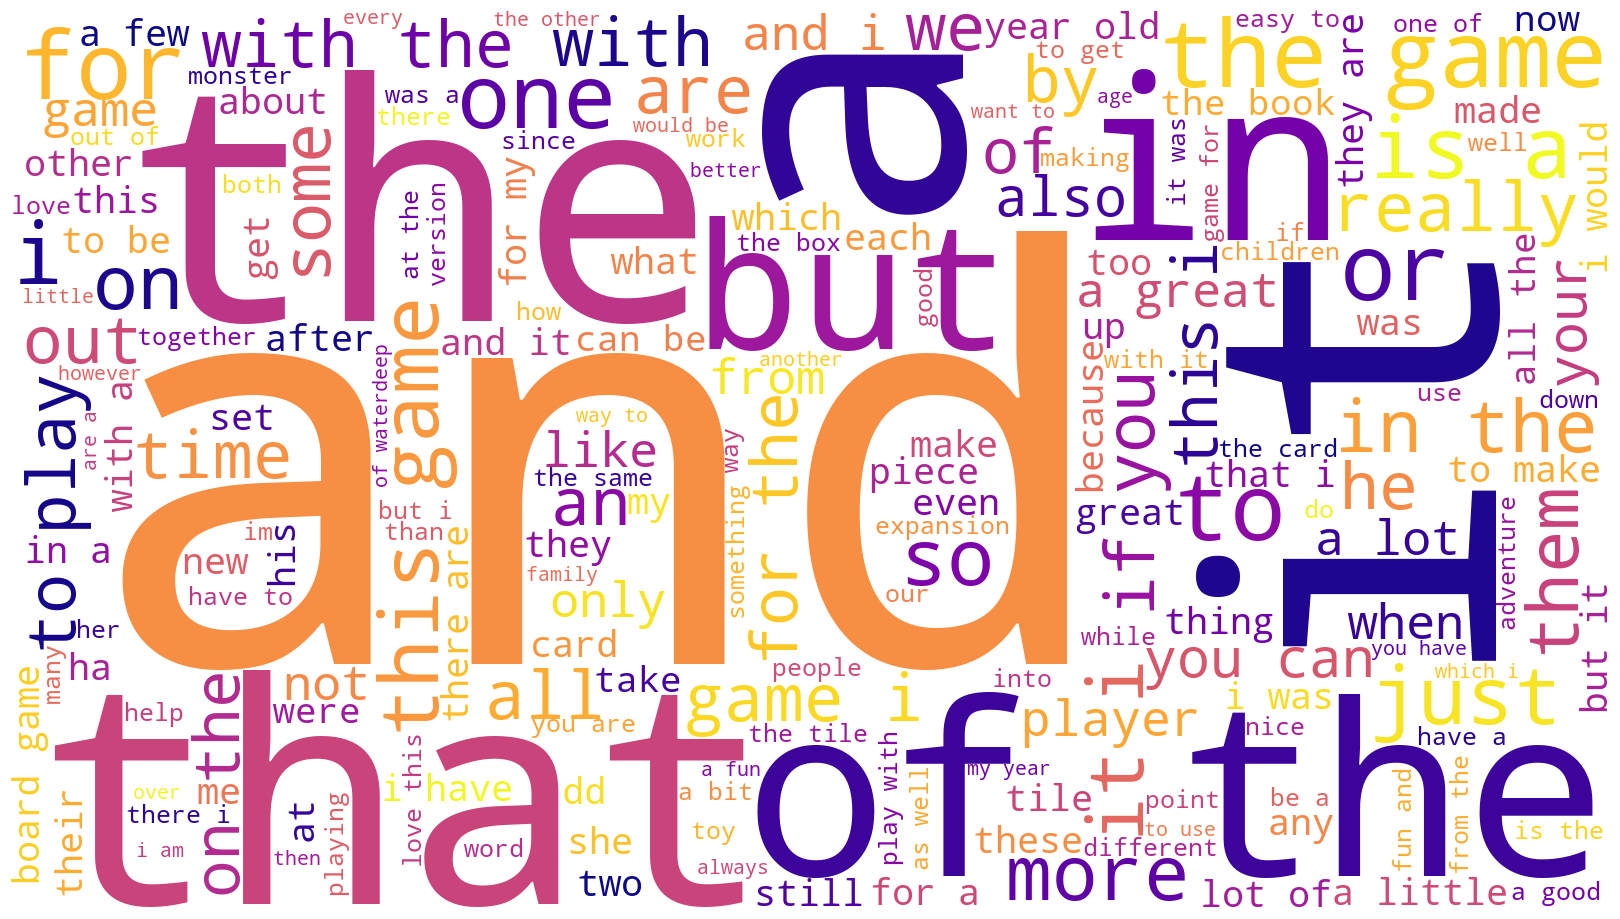

In [50]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_review) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [51]:
#Empty string variable.
all_summary = ''
for i in range(df3_copied.shape[0]):
    # Add each comment.
    all_summary = all_summary + df3_copied['summary'][i]

In [52]:
# Summary: Create a word cloud.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud_summary = WordCloud(width = 1600, height = 900, 
                    background_color ='white',
                    colormap = 'plasma', 
                    stopwords = 'none',
                    min_font_size = 10).generate(all_summary) 

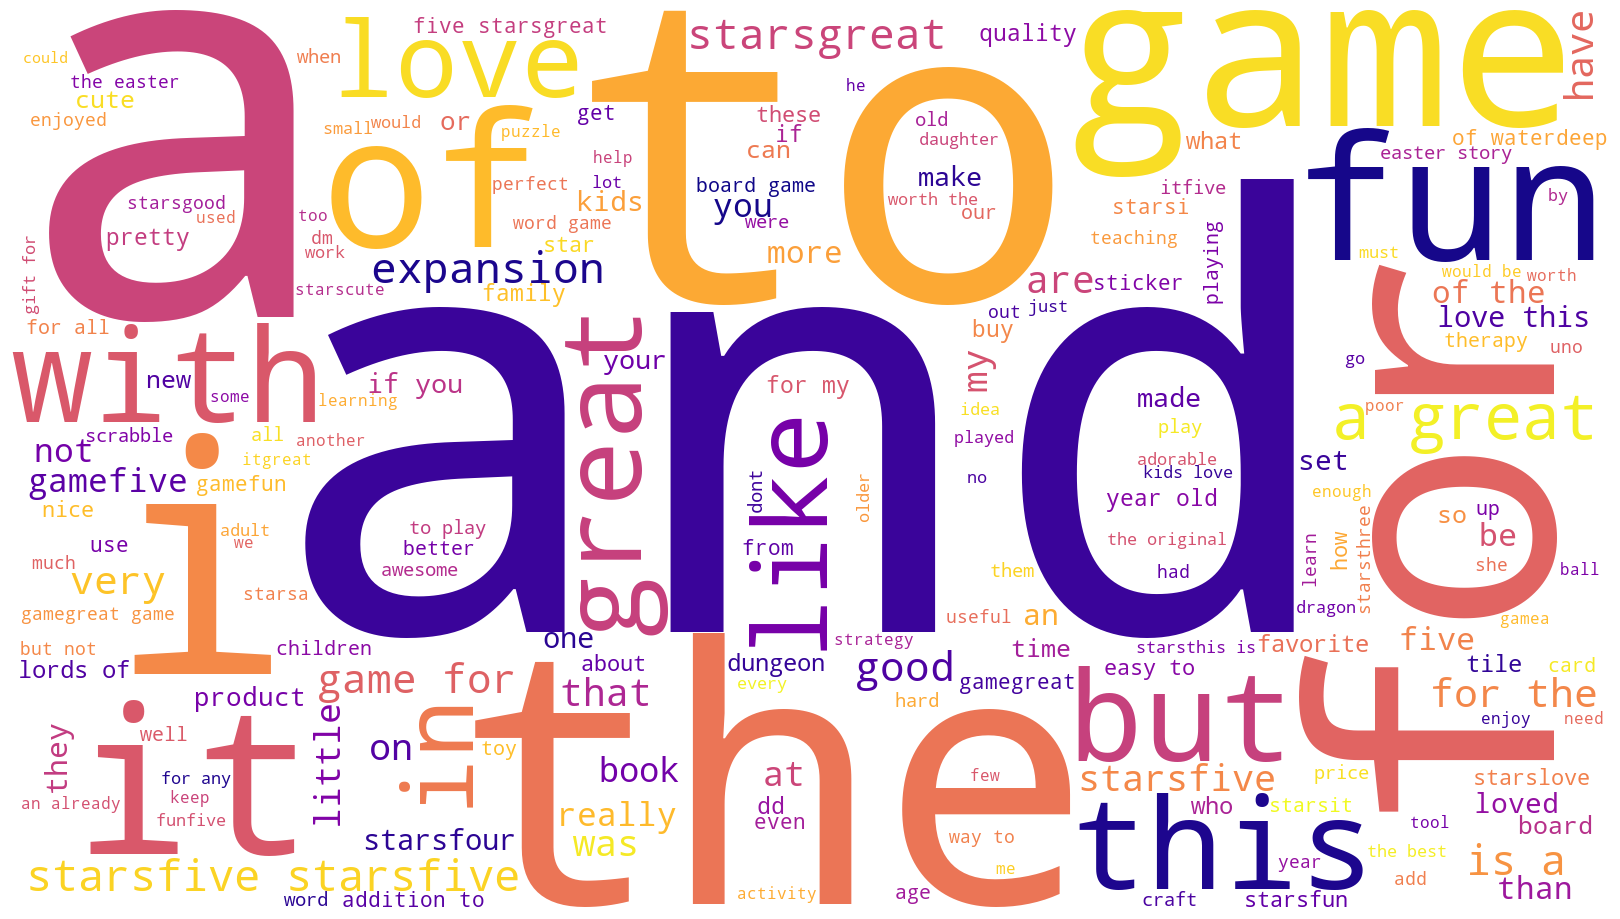

In [53]:

# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud_summary) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [55]:
# Determine the frequency distribution.
from nltk.probability import FreqDist
#Empty list of tokens.
all_tokens_review = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df3_copy['tokens_review'][i]

In [57]:
fdist_df4 = FreqDist(all_tokens_review)

# Preview data.
fdist_df4

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [58]:
# Determine the frequency distribution of summaries.
# Define an empty list of tokens.
all_tokens_summaries = []

for i in range(df3_copied.shape[0]):
    # Add each token to the list.
    all_tokens_summaries = all_tokens_summaries + df3_copied['tokens_summary'][i]

In [60]:
# Calculate the frequency distribution.
fdist_sum = FreqDist(all_tokens_review)

# Preview data.
fdist_sum

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

### 4b) Remove alphanumeric characters and stopwords

In [68]:
tokens_r = [word for word in all_tokens_review if word.isalnum()]
tokens_s = [word for word in all_tokens_summaries if word.isalnum()]

In [ ]:
# Delete all the alpanum.


In [70]:
nltk.download('stopwords')
# Remove all the stopwords
# Remove all the stopwords in reviews.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_r_fil = [x for x in tokens_r if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_r_2_string = ''

for value in tokens_r:
    # Add each filtered token word to the string.
    tokens_r_2_string = tokens_r_2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdio\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [71]:
# Remove all the stopwords in summaries.
# Create a filtered list of tokens without stopwords.
tokens_s_2 = [x for x in tokens_s if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_s_2_string = ''

for value in tokens_s:
    # Add each filtered token word to the string.
    tokens_s_2_string = tokens_s_2_string + value + ' '

### 4c) Create wordcloud without stopwords

In [75]:
# Create a wordcloud without stop words.

wordcloud_r_fil = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_r_2_string) 


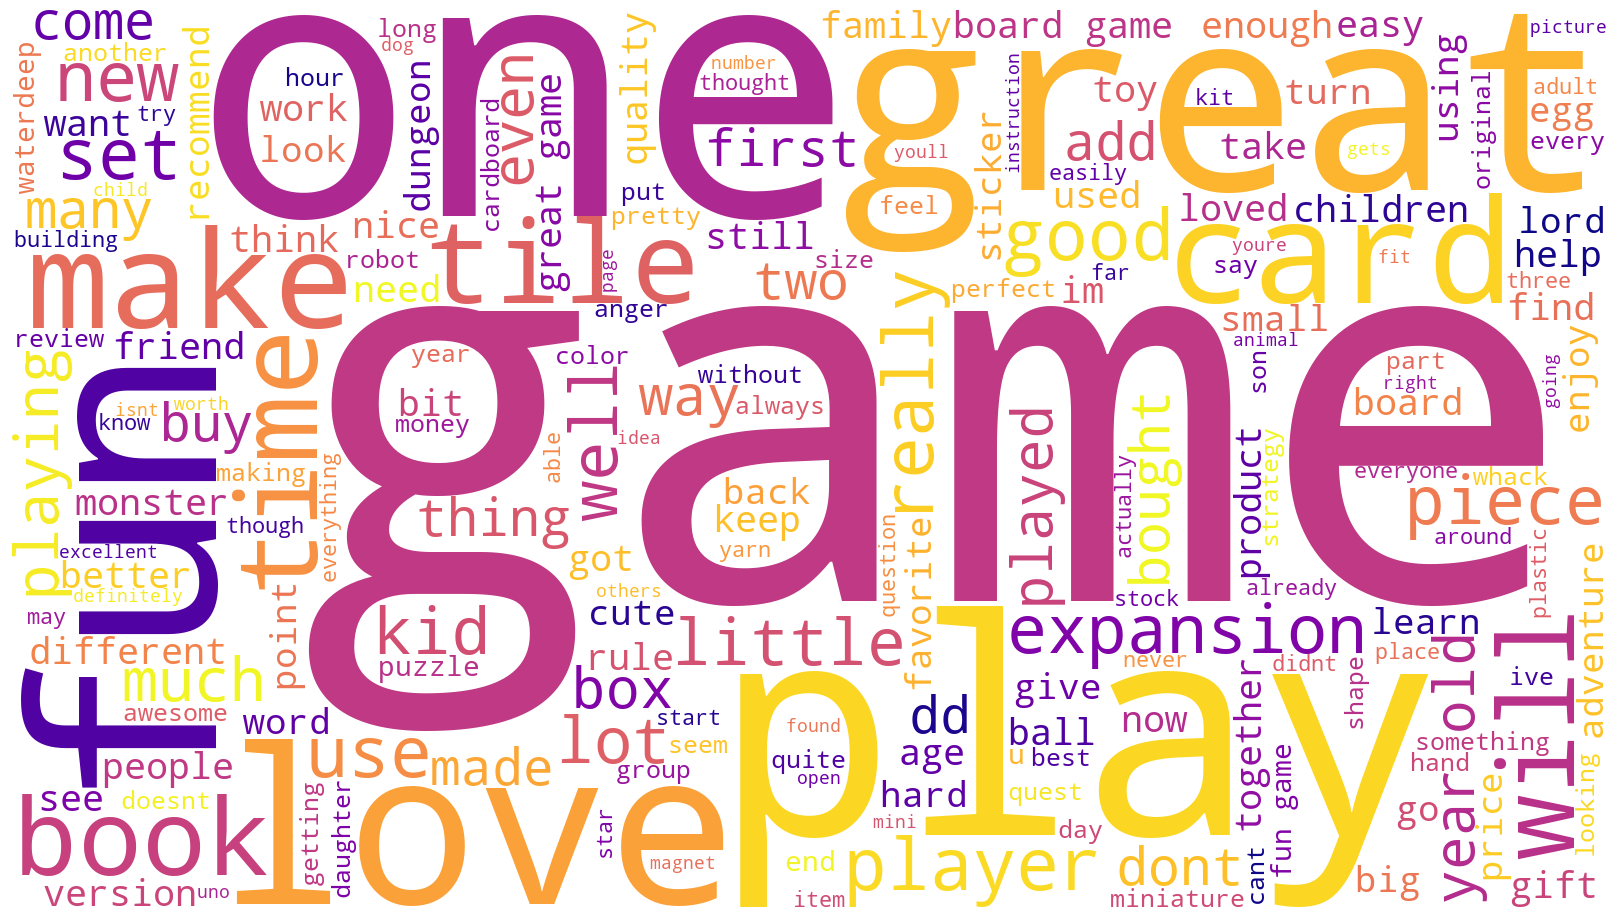

In [73]:
# Plot the wordcloud image.
                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_r_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

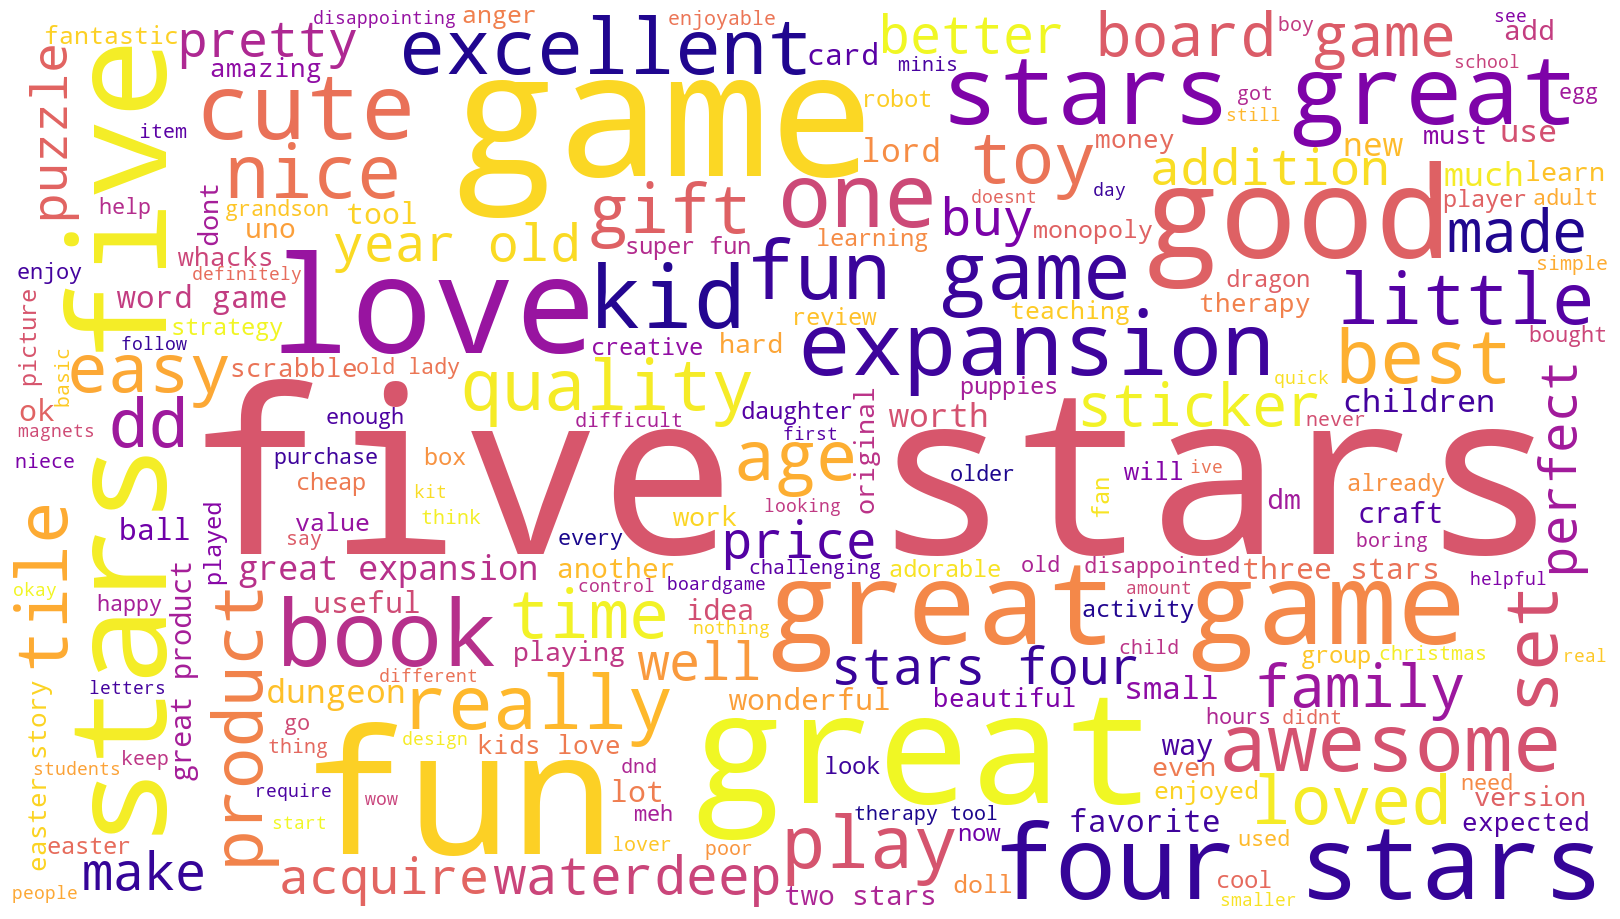

In [77]:
# Plot the wordcloud image.
wordcloud_s_fil = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_s_2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_s_2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [79]:
# Determine the 15 most common words.
# View the frequency distribution for reviews.
fdist_r_fre = FreqDist(tokens_r_2)

# Preview the data.
fdist_r_fre

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [93]:
#top15_words_review
most_counts_rew = pd.DataFrame(Counter(tokens_r_2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
most_counts_rew

,Frequency
Word,
game,1671
great,580
fun,552
one,530
play,502
like,414
love,323
really,319
get,319


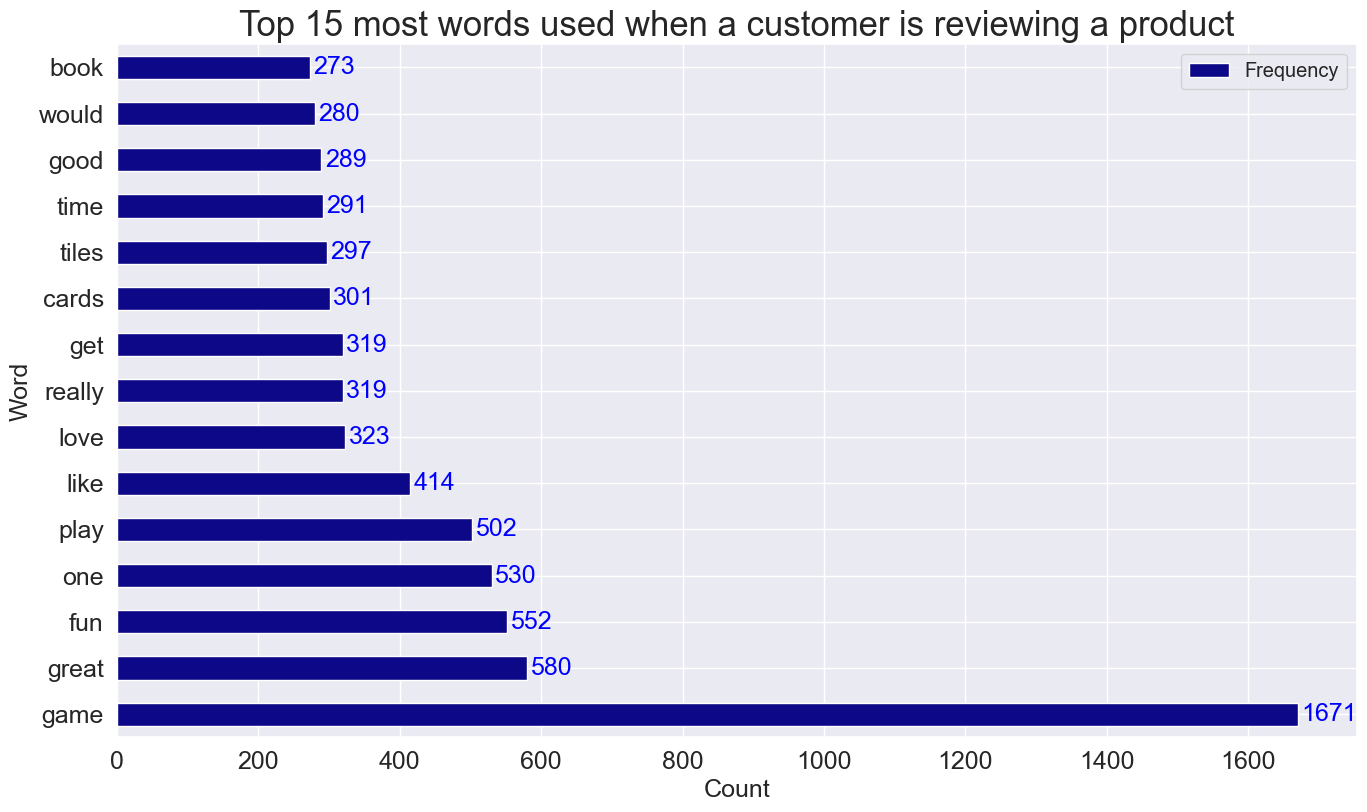

In [94]:
#Creating a barchart
ax1 = most_counts_rew.plot(kind='barh',
                              figsize=(16, 9),
                              fontsize=18,
                              colormap='plasma')
ax1.set_xlabel('Count', fontsize=18)
ax1.set_ylabel('Word', fontsize=18)
ax1.set_title(
    'Top 15 most words used when a customer is reviewing a product', fontsize=25)
ax1.legend(fontsize='large')

for i in ax1.patches:
    ax1.text(i.get_width()+5, i.get_y()+.1,
             str(round((i.get_width()), 2)), fontsize=18, color='blue')

In [95]:
most_counts_sum = pd.DataFrame(Counter(tokens_s_2).most_common(15),
                                   columns=['Word', 'Frequency']).set_index('Word')
most_counts_sum

,Frequency
Word,
stars,427
five,342
game,319
great,295
fun,218
love,93
good,92
four,58
like,54


first and second in the list is star and five.I believe 'five stars' is a commonly used.Stars (427) - five (342) equals 85.
85-(58)four in words in comments equals 27 and this gives us basic approach this comments mainly were 5 stars and 4 stars.


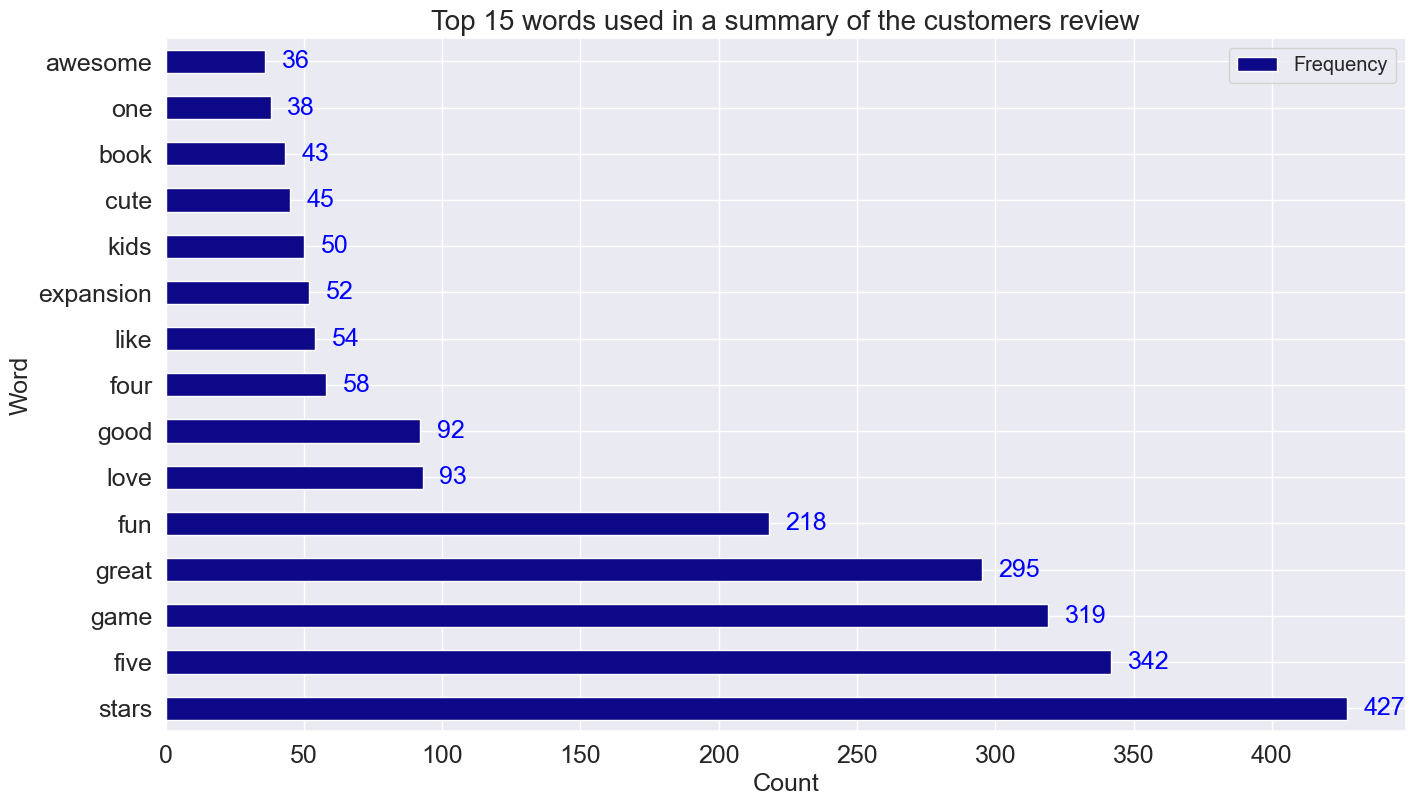

In [100]:
#Creating a bar chart
ax2 = most_counts_sum.plot(kind='barh',
                               figsize=(16, 9),
                               fontsize=18,
                               colormap='plasma')
ax2.set_xlabel('Count', fontsize=18)
ax2.set_ylabel('Word', fontsize=18)
ax2.set_title(
    'Top 15 words used in a summary of the customers review', fontsize=20)
ax2.legend(fontsize='large')

for j in ax2.patches:
    ax2.text(j.get_width()+6, j.get_y()+.1,
             str(round((j.get_width()), 2)), fontsize=18, color='blue')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [128]:
from textblob import TextBlob

In [129]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]
df3_copied

,index,review,summary,tokens_review,tokens_summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...,"[when, it, comes, to, a, dms, screen, the, spa...","[the, fact, that, 50, of, this, space, is, was..."
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...,"[an, open, letter, to, galeforce9, your, unpai...","[another, worthless, dungeon, masters, screen,..."
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless,"[nice, art, nice, printing, why, two, panels, ...","[pretty, but, also, pretty, useless]"
3,3,amazing buy bought it as a gift for our new dm...,five stars,"[amazing, buy, bought, it, as, a, gift, for, o...","[five, stars]"
4,4,as my review of gf9s previous screens these we...,money trap,"[as, my, review, of, gf9s, previous, screens, ...","[money, trap]"
...,...,...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom,"[the, perfect, word, game, for, mixed, ages, w...","[the, perfect, word, game, for, mixed, ages, w..."
1957,1996,great game did not think i would like it when ...,super fun,"[great, game, did, not, think, i, would, like,...","[super, fun]"
1958,1997,great game for all keeps the mind nimble,great game,"[great, game, for, all, keeps, the, mind, nimble]","[great, game]"
1959,1998,fun game,four stars,"[fun, game]","[four, stars]"


In [130]:
# Determine polarity of both columns.
# Populate a new column with polarity scores for each comment.

df3_copied['polarity_r'] = df3_copied['review'].apply(generate_polarity)

# Preview the result.
df3_copied['polarity_r'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_r, dtype: float64

In [131]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each comment.
df3_copy['polarity_s'] = df3_copy['summary'].apply(generate_polarity)

# Preview the result.
df3_copy['polarity_s'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_s, dtype: float64

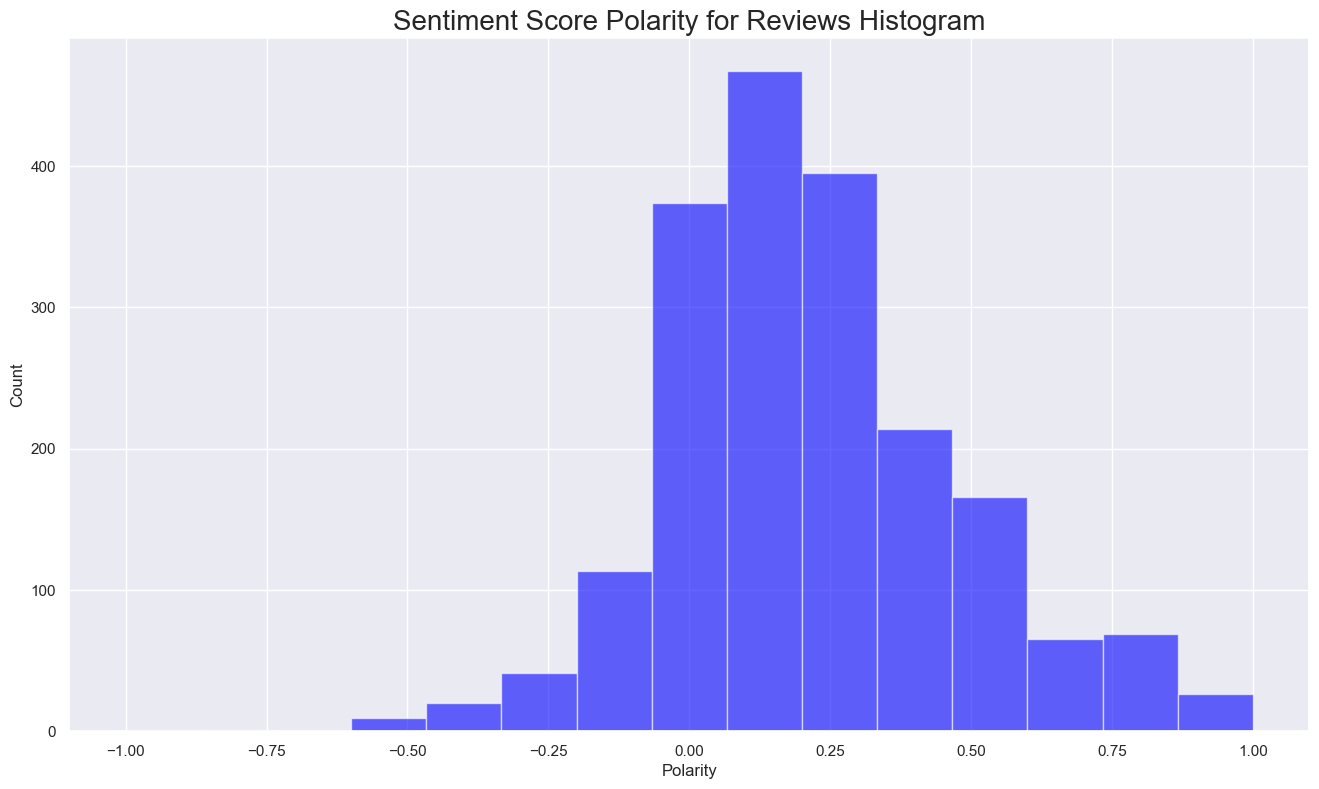

In [142]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copied['polarity_r'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Sentiment Score Polarity for Reviews Histogram', fontsize=20)

# Histogram of sentiment score
plt.show()

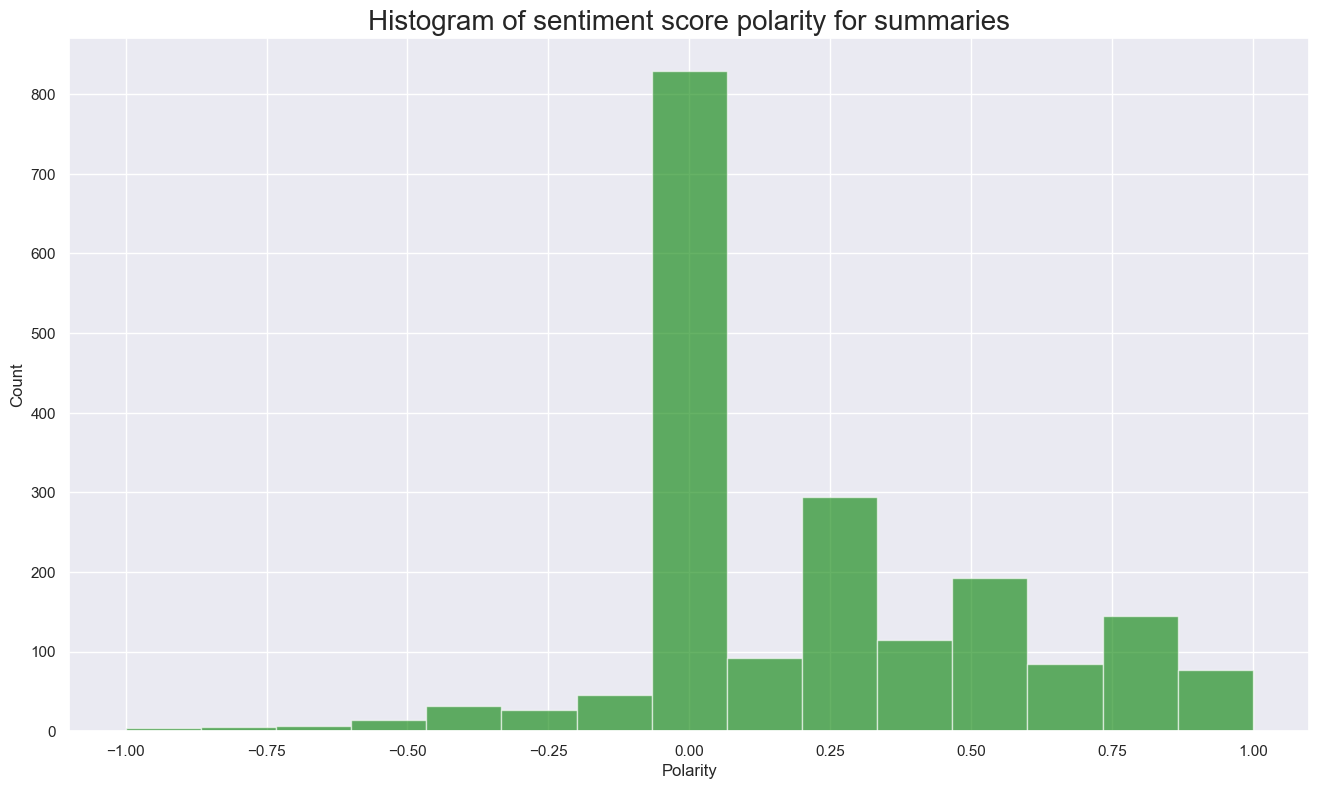

In [141]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['polarity_s'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for summaries', fontsize=20)

# Histogram of sentiment score
plt.show()

We reached two different histogram models.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [155]:
# Top 20 negative reviews.
# Create a DataFrame.
negative1r = df3_copied.nsmallest(20, 'polarity_r')

# Eliminate unnecessary columns.
negative1r = negative1r[['review', 'polarity_r', ]]

# Adjust the column width.
negative1r.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
negative1r

,review,polarity_r
207,booo unles you are patient know how to measure...,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring...,-0.583333
362,one of my staff will be using this game soon s...,-0.550000
116,i bought this as a christmas gift for my grand...,-0.500000
226,this was a gift for my daughter i found it dif...,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [156]:
# Top 20 negative summaries.

# Create a DataFrame.
negatives1 = df3_copy.nsmallest(20, 'polarity_s')

# Eliminate unnecessary columns.
negatives1 = negatives1[['summary', 'polarity_s']]

# Adjust the column width.
negatives1.style.set_properties(subset=['summary'], **{'width': '2000px'})

# View output.
negatives1

,summary,polarity_s
21,the worst value ive ever seen,-1.000000
207,boring unless you are a craft person which i am,-1.000000
819,boring,-1.000000
1148,before this i hated running any rpg campaign d...,-0.900000
1,another worthless dungeon masters screen from ...,-0.800000
143,disappointed,-0.750000
623,disappointed,-0.750000
785,disappointed,-0.750000
1591,disappointed,-0.750000
361,promotes anger instead of teaching calming met...,-0.700000


In [157]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_r1 = df3_copied.nlargest(20, 'polarity_r')

# Eliminate unnecessary columns.
positive_r1 = positive_r1[['review', 'polarity_r']]

# Adjust the column width.
positive_r1.style.set_properties(subset=['review'], **{'width': '1200px'})

# View output.
positive_r1

,review,polarity_r
7,came in perfect condition,1.0
164,awesome book,1.0
193,awesome gift,1.0
489,excellent activity for teaching selfmanagement...,1.0
517,perfect just what i ordered,1.0
583,wonderful product,1.0
601,delightful product,1.0
613,wonderful for my grandson to learn the resurre...,1.0
782,perfect,1.0
923,awesome,1.0


In [160]:
# Top 20 positive summaries.

# Create a DataFrame.
positive_s12 = df3_copy.nlargest(20, 'polarity_s')

# Eliminate unnecessary columns.
positivet_s12 = positive_s12[['summary', 'polarity_s']]

# Adjust the column width.
positive_s12.style.set_properties(subset=['summary'], **{'width': '1200px'})

# View output.
positive_s12

,index,review,summary,tokens_review,tokens_summary,polarity_s
6,6,i have bought many gm screens over the years b...,best gm screen ever,"[i, have, bought, many, gm, screens, over, the...","[best, gm, screen, ever]",1.0
28,28,these are intricate designs for older children...,wonderful designs,"[these, are, intricate, designs, for, older, c...","[wonderful, designs]",1.0
32,32,awesome my 8 year olds favorite xmas gift its ...,perfect,"[awesome, my, 8, year, olds, favorite, xmas, g...",[perfect],1.0
80,80,my daughter loves these little books theyre th...,theyre the perfect size to keep in the car or ...,"[my, daughter, loves, these, little, books, th...","[theyre, the, perfect, size, to, keep, in, the...",1.0
133,134,this occupied my almost3 year old for nearly a...,perfect for preschooler,"[this, occupied, my, almost3, year, old, for, ...","[perfect, for, preschooler]",1.0
139,140,i bought 8 of these for my 3 year old daughter...,awesome sticker activity for the price,"[i, bought, 8, of, these, for, my, 3, year, ol...","[awesome, sticker, activity, for, the, price]",1.0
160,161,my 8 year old son loves this drawing book love...,awesome book,"[my, 8, year, old, son, loves, this, drawing, ...","[awesome, book]",1.0
162,163,this was a christmas present for a nephew who ...,he was very happy with his gift,"[this, was, a, christmas, present, for, a, nep...","[he, was, very, happy, with, his, gift]",1.0
186,187,great product took a little practice and time ...,awesome,"[great, product, took, a, little, practice, an...",[awesome],1.0
209,210,i was skeptical but my 9 year old has had so m...,awesome and welldesigned for 9 year olds,"[i, was, skeptical, but, my, 9, year, old, has...","[awesome, and, welldesigned, for, 9, year, olds]",1.0


## 7. Discuss: Insights and observations

***Your observations here...***

Summary of the analyis shows us what is the most frequent words inside the reviews,summaries and sentiments.
The histograms show a generally positive sentiment for both reviews and summaries as well as having a higher frequency of results scoring positively for polarity.
The frequency of the most common words showing us Turtle Game's games are successful however there are some negative ones such as boring etc.

# 